<h1>Análisis Exploratorio de Datos

En este Notebook se realiza el análisis exploratorio de datos (EDA) con los conjuntos de datos previamente trabajados para posteriormente poder realizar el modelo de recomendación.

<h2>Importaciones

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings("ignore")

In [3]:
def dataPercentage(df, column):
    counts=df[column].value_counts()
    percentages=round(100*counts/len(df),2)
    dfResults=pd.DataFrame({
        "Cantidad":counts,
        "Porcentaje":percentages
    })
    return dfResults

In [4]:
def dataType(df):
        dfDict={"name":[],"data_type":[],"not_null_%":[],"null_%":[],"null":[]}
        for column in df.columns:
                notNull=(df[column].count() / len(df)) * 100
                dfDict["name"].append(column)
                dfDict["data_type"].append(df[column].apply(type).unique())
                dfDict["not_null_%"].append(round(notNull, 2))
                dfDict["null_%"].append(round(100-notNull, 2))
                dfDict["null"].append(df[column].isnull().sum())
        dataTypeDf=pd.DataFrame(dfDict)
        return dataTypeDf

<H2>Dataset userReviews

En esta sección se desarrolla el EDA del archivo '´userReviews´'

In [2]:
userReviewsData=pd.read_parquet('data/userReviews.parquet')
userReviewsExplodeData=pd.read_parquet('data/userReviewsExploded.parquet')
userReviewsDf=pd.DataFrame(userReviewsData)
userReviewsExplodedDf=pd.DataFrame(userReviewsExplodeData)

In [3]:
userReviewsDf.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'helpful': 'No ratings yet', 'i..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'helpful': '15 of 20 people (75..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'helpful': 'No ratings yet', 'i..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'helpful': '2 of 2 people (100%..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [4]:
userReviewsExplodedDf.head()

,user_id,recommend,item_id,review_date,review_year,sentiment_analysis
0,76561197970982479,True,1250,2011-11-05,2011,2
1,76561197970982479,True,22200,2011-07-15,2011,2
2,76561197970982479,True,43110,2011-04-21,2011,2
3,js41637,True,251610,2014-06-24,2014,2
4,js41637,True,227300,2013-09-08,2013,2


In [5]:
userReviewsExplodedDf.sort_values(by='review_year')

,user_id,recommend,item_id,review_date,review_year,sentiment_analysis
41068,76561197988318026,True,440,2010-12-18,2010,2
29807,farsel,True,24010,2010-11-19,2010,2
29806,farsel,True,8800,2010-11-24,2010,2
9683,76561198023634778,True,440,2010-11-26,2010,2
29802,farsel,True,12900,2010-11-26,2010,2
...,...,...,...,...,...,...
59300,76561198312638244,True,70,NaT,<NA>,2
59301,76561198312638244,True,362890,NaT,<NA>,2
59302,LydiaMorley,True,273110,NaT,<NA>,2
59303,LydiaMorley,True,730,NaT,<NA>,2


In [7]:
dataType(userReviewsExplodedDf)

,name,data_type,not_null_%,null_%,null
0,user_id,[<class 'str'>],100.00,0.00,0
1,recommend,[<class 'bool'>],100.00,0.00,0
2,item_id,[<class 'str'>],100.00,0.00,0
3,review_date,[<class 'pandas._libs.tslibs.timestamps.Timest...,82.94,17.06,10119
4,review_year,[<class 'float'>],82.94,17.06,10119
5,sentiment_analysis,[<class 'str'>],100.00,0.00,0


In [8]:
userReviewsExplodedDf['review_year'].unique()

<IntegerArray>
[2011, 2014, 2013, <NA>, 2015, 2012, 2010]
Length: 7, dtype: Int64

In [9]:
reviews=userReviewsDf[userReviewsDf['user_id']=='76561198312638244']['reviews'].explode().reset_index(drop=True)
response=(pd.DataFrame(reviews)).iloc[3,0]
print(response['posted'])

Posted July 8.


Se concluye que los registros fueron probablemente publicados el año del corte

In [11]:
dataPercentage(userReviewsExplodedDf,'sentiment_analysis')

,Cantidad,Porcentaje
sentiment_analysis,,
2,37417,63.09
1,12276,20.70
0,9612,16.21


In [12]:
dataPercentage(userReviewsExplodedDf,'recommend')

,Cantidad,Porcentaje
recommend,,
True,52473,88.48
False,6832,11.52


In [13]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
groupedDf = userReviewsExplodedDf.groupby(['sentiment_analysis', 'recommend'])
# Se cuentan la cantidad de reviews en cada grupo
groupedDfSize = groupedDf.size()
# Se calcula el porcentaje por cada grupo
groupedDfPercent = 100 * groupedDf.size() / len(userReviewsExplodedDf)
# Se crea un datafram con el resumen
recommendAnalysis = pd.DataFrame({
    "Cantidad": groupedDfSize,
    "Porcentaje": groupedDfPercent
})
recommendAnalysis

Cantidad  Porcentaje
sentiment_analysis recommend                      
0                  False          2913    4.911896
                   True           6699   11.295844
1                  False          1488    2.509063
                   True          10788   18.190709
2                  False          2431    4.099148
                   True          34986   58.993340

In [14]:
print(f"Cantidad de usuarios únicos que opinaron: {len(userReviewsExplodedDf['user_id'].unique())}")

Cantidad de usuarios únicos que opinaron: 25458


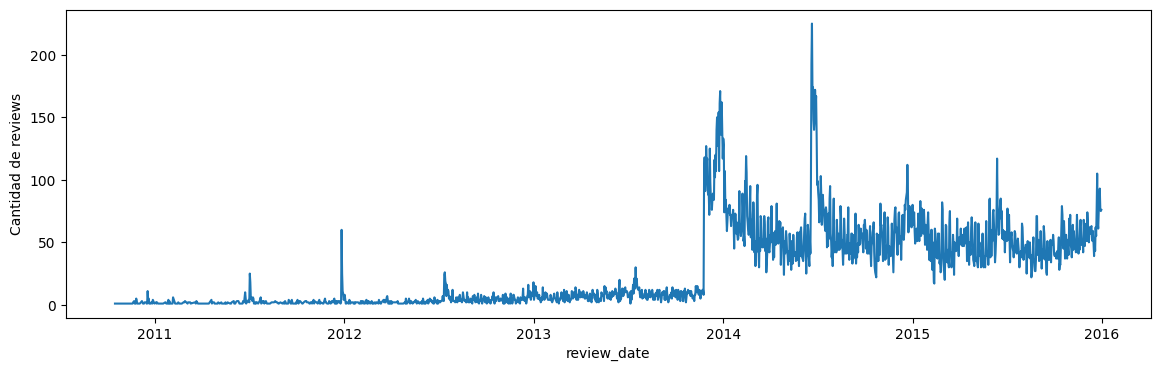

In [15]:
# Se hace un dataframe auxiliar para analizar solo las fechas (hay campos con 'Datos no disponibles')
df = userReviewsExplodedDf.dropna()
df = pd.DataFrame(df)
# Calcula la cantidad de review por fecha
df_counts = df.groupby('review_date').count()

# Grafica
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x='review_date', y='recommend')
plt.ylabel('Cantidad de reviews')
plt.show()

In [16]:
print('Días de cantidad pico de reviews')
df_counts.sort_values(by='recommend', ascending=False)['recommend'][:5]

Días de cantidad pico de reviews


review_date
2014-06-21    225
2014-06-20    193
2014-06-23    174
2014-06-27    172
2013-12-26    171
Name: recommend, dtype: int64

<h2>Dataset steamGames

In [17]:
steamGamesData = pd.read_parquet('data/steamGames.parquet')
steamGamesDf = pd.DataFrame(steamGamesData)
steamGamesGenresExplodedData = pd.read_parquet('data/steamGamesGenresExploded.parquet')
steamGamesGenresExplodedDf = pd.DataFrame(steamGamesGenresExplodedData)
steamGamesPriceData = pd.read_parquet('data/steamGamesPrice.parquet')
steamGamesPriceDf = pd.DataFrame(steamGamesPriceData)
steamGamesDf.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,item_id,developer,release_year
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,2018
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,643980,Secret Level SRL,2018
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,670290,Poolians.com,2017
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,2017
4,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,NaT,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,None,0


In [18]:
dataType(steamGamesDf)

,name,data_type,not_null_%,null_%,null
0,publisher,"[<class 'str'>, <class 'NoneType'>]",74.94,25.06,8052
1,genres,"[<class 'numpy.ndarray'>, <class 'NoneType'>]",89.78,10.22,3283
2,app_name,"[<class 'str'>, <class 'NoneType'>]",99.99,0.01,2
3,title,"[<class 'str'>, <class 'NoneType'>]",93.62,6.38,2050
4,url,[<class 'str'>],100.00,0.00,0
5,release_date,[<class 'pandas._libs.tslibs.timestamps.Timest...,93.03,6.97,2241
6,tags,"[<class 'numpy.ndarray'>, <class 'NoneType'>]",99.49,0.51,163
7,reviews_url,"[<class 'str'>, <class 'NoneType'>]",99.99,0.01,2
8,specs,"[<class 'numpy.ndarray'>, <class 'NoneType'>]",97.92,2.08,670
9,price,[<class 'float'>],95.71,4.29,1377


In [19]:
gameTotal = len(steamGamesDf['item_id'].unique())
print(f"El total de juegos que hay registrados son: {gameTotal}")

El total de juegos que hay registrados son: 32133


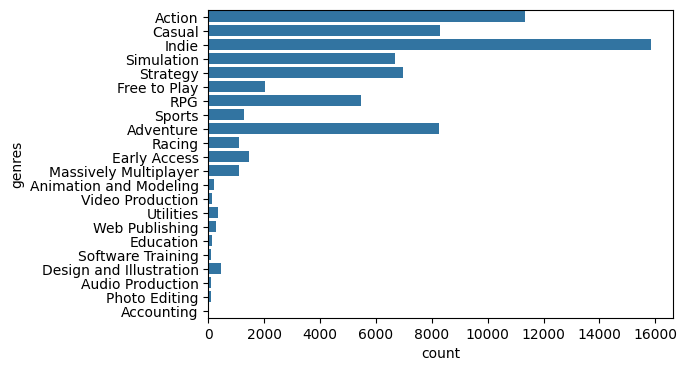

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=steamGamesGenresExplodedDf, y='genres', orient='h')
plt.show()

In [21]:
dataPercentage(steamGamesGenresExplodedDf,'genres')

,Cantidad,Porcentaje
genres,,
Indie,15858,22.16
Action,11321,15.82
Casual,8282,11.57
Adventure,8243,11.52
Strategy,6957,9.72
Simulation,6699,9.36
RPG,5479,7.66
Free to Play,2031,2.84
Early Access,1462,2.04


In [22]:
dataPercentage(steamGamesGenresExplodedDf,'release_year')[:20]

,Cantidad,Porcentaje
release_year,,
2017,25101,35.08
2016,17690,24.72
2015,12272,17.15
2014,6367,8.90
2013,3017,4.22
2012,2109,2.95
2011,987,1.38
2010,663,0.93
0,543,0.76


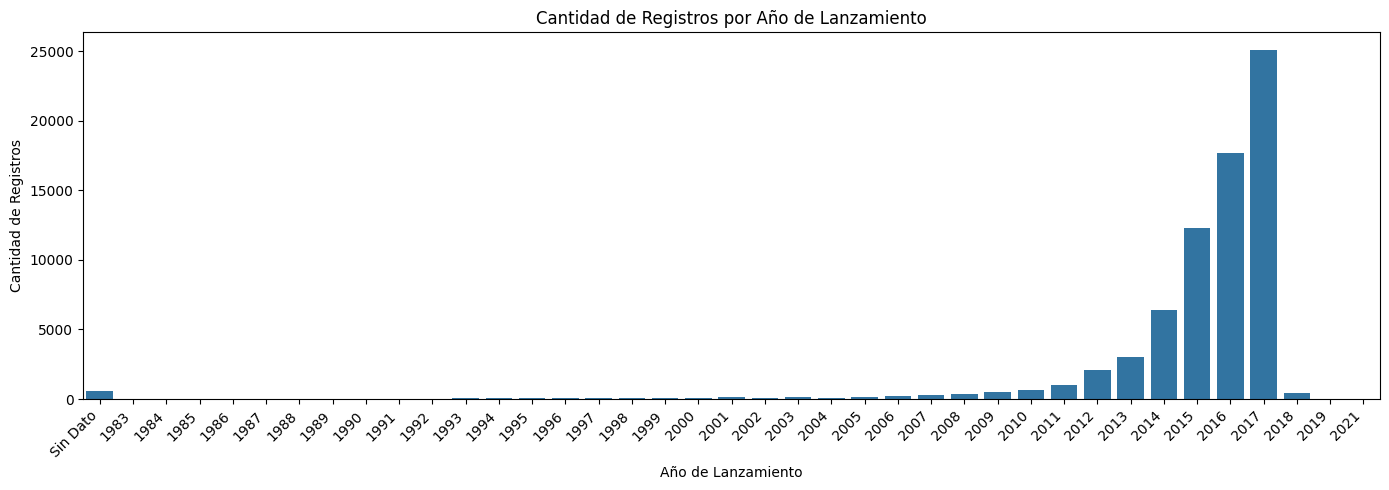

In [23]:
# Cuenta la frecuencia de cada año
yearCount = steamGamesGenresExplodedDf['release_year'].value_counts()
# Ordena los valores para que 'Datos no disponibles' queden al principio o al final
yearCount = yearCount.sort_index()
yearCount = yearCount.rename(index={0: 'Sin Dato'})

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=yearCount.index, y=yearCount.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

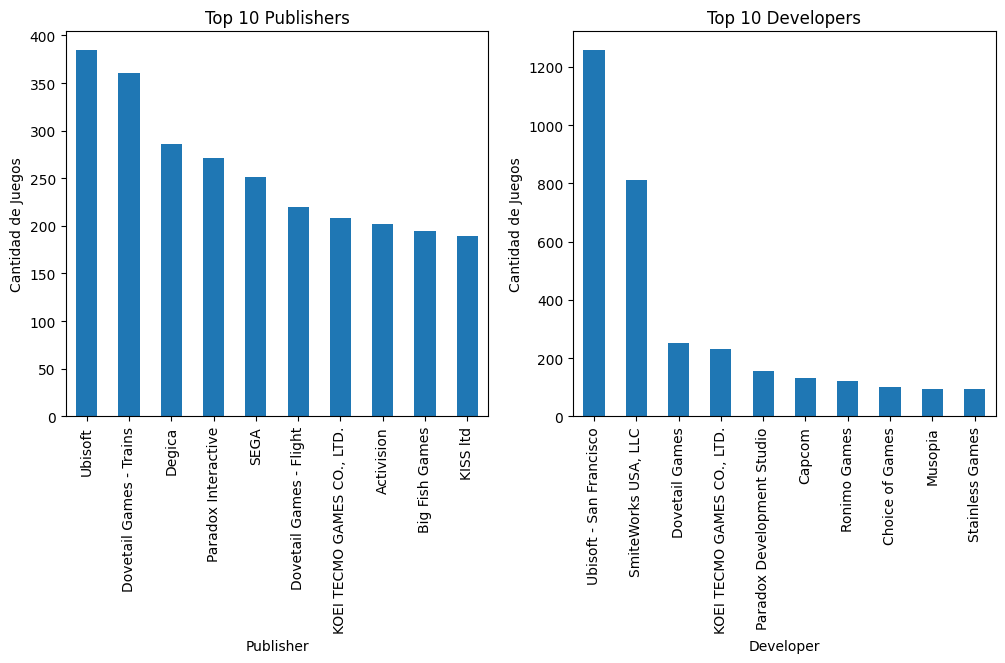

In [24]:
# Contar la cantidad de juegos por publisher
pubCount = steamGamesDf['publisher'].value_counts()

# Contar la cantidad de juegos por developer
devCount = steamGamesDf['developer'].value_counts()

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
pubCount[:10].plot(kind='bar')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
devCount[:10].plot(kind='bar',)
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
# plt.tight_layout()
plt.show()

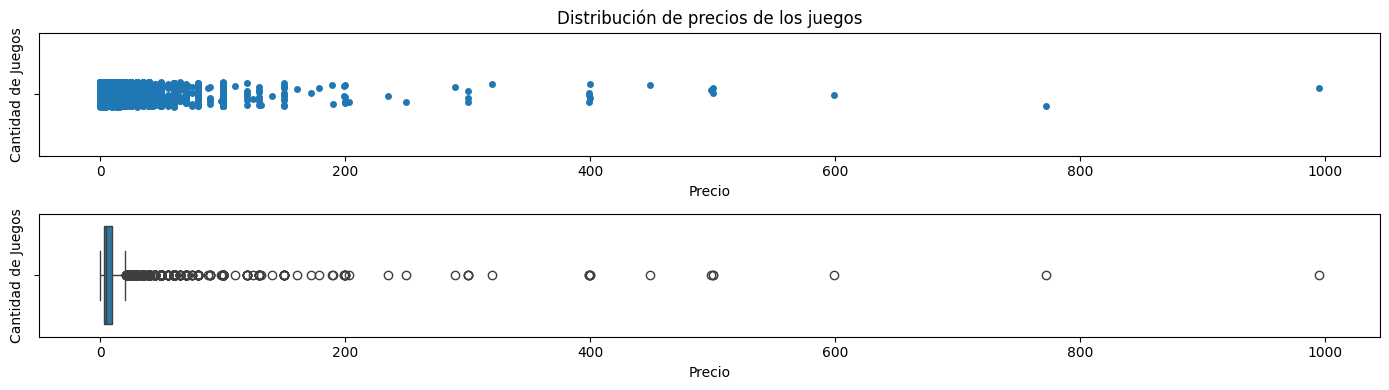

In [25]:
# Obtén los precios únicos para cada juego y crea un DataFrame
pricesDf = steamGamesPriceDf.groupby('item_id')['price'].unique().reset_index().explode('price')

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 4), sharex=False)

# Gráfico de dispersión (stripplot)
sns.stripplot(data=pricesDf, x='price', ax=ax1)
ax1.set_xlabel('Precio')
ax1.set_ylabel('Cantidad de Juegos')
ax1.set_title('Distribución de precios de los juegos')

# Diagrama de caja (boxplot)
sns.boxplot(data=pricesDf, x='price', ax=ax2)
ax2.set_xlabel('Precio')
ax2.set_ylabel('Cantidad de Juegos')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [26]:
stats = pricesDf['price'].astype(float).describe()
print(f'El precio medio (mediana) de los juegos es de: {stats[5]}')
print(f'El precio promedio (mean) de los juegos es de: {round(stats[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {stats[6]}')

El precio medio (mediana) de los juegos es de: 4.99
El precio promedio (mean) de los juegos es de: 8.9
El 75% de los juegos tienen un precio menor de: 9.99


<h2>Dataset userItems

In [44]:
userItemsExplodedData = pd.read_parquet('data/userItemsExploded.parquet')
userItemsExplodedDf=pd.DataFrame(userItemsExplodedData)
userItemCountData = pd.read_parquet('data/userItemCount.parquet')
userItemCountDf=pd.DataFrame(userItemCountData)

In [43]:
userItemsExplodedDf.head()

,user_id,item_id,playtime
0,76561197970982479,10,6.0
1,76561197970982479,20,0.0
2,76561197970982479,30,7.0
3,76561197970982479,40,0.0
4,76561197970982479,50,0.0


In [45]:
userItemCountDf.head()

,user_id,items_count
0,76561197970982479,277
1,js41637,888
2,evcentric,137
3,Riot-Punch,328
4,doctr,541


Text(0, 0.5, 'Cantidad de Juegos')

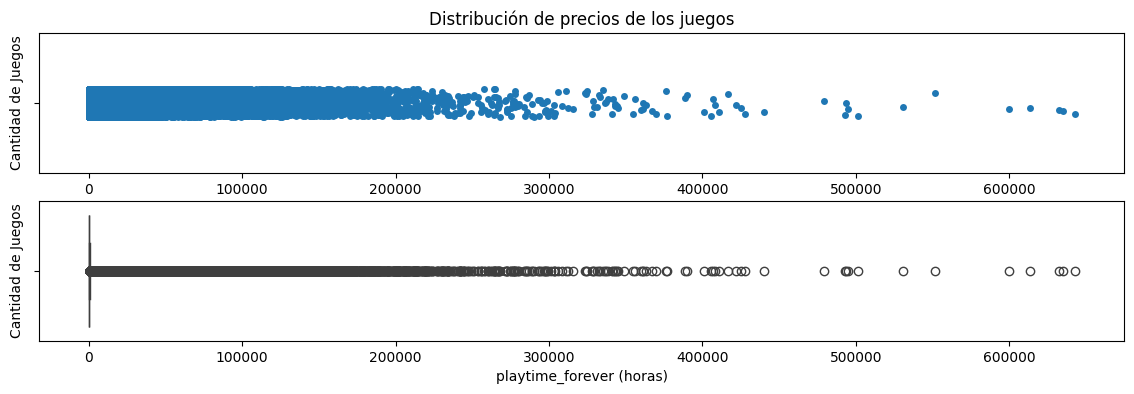

In [37]:
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=userItemsDf, x='playtime', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=userItemsDf, x='playtime', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

In [47]:
stats = userItemsExplodedDf['playtime'].astype(float).describe()
print(f'El tiempo de juego medio (mediana) de los juegos es de: {stats[5]} horas')
print(f'El tiempo de juego promedio (mean) de los juegos es de: {round(stats[1],2)} horas')
print(f'El 75% de los juegos tienen un tiempo de juego menor de: {stats[6]} horas')

El tiempo de juego medio (mediana) de los juegos es de: 34.0 horas
El tiempo de juego promedio (mean) de los juegos es de: 991.5 horas
El 75% de los juegos tienen un tiempo de juego menor de: 355.0 horas


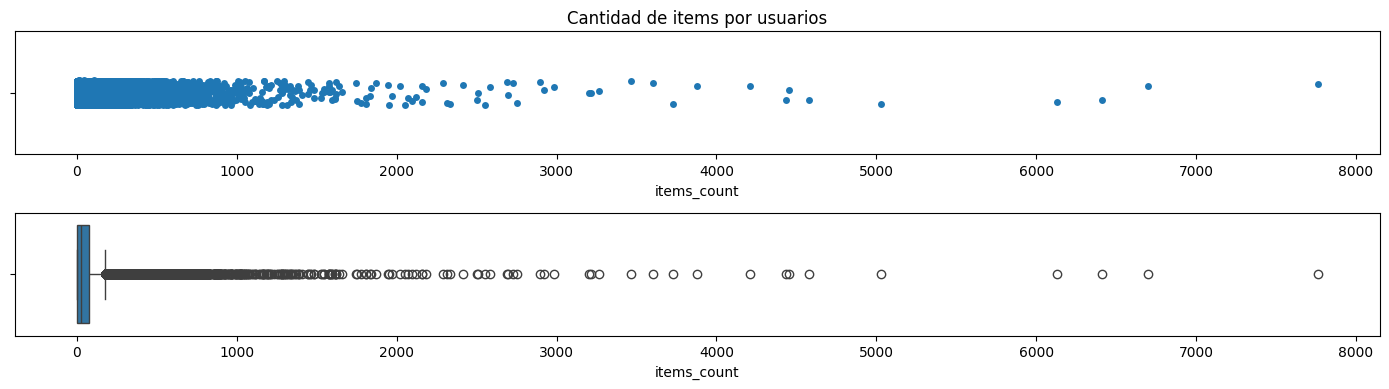

In [46]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
userItemCountDf = userItemCountDf.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=userItemCountDf, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=userItemCountDf, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [51]:
stats = userItemCountDf['items_count'].astype(float).describe()
print(f'La cantidad media (mediana) de items por persona es de: {stats[5]}')
print(f'La cantidad promedio (mean) de items por persona es de: {round(stats[1],2)}')
print(f'El 75% de las personas tienen un total de items menor a: {stats[6]}')

La cantidad media (mediana) de items por persona es de: 26.0
La cantidad promedio (mean) de items por persona es de: 58.35
El 75% de las personas tienen un total de items menor a: 73.0


<Figure size 1400x500 with 0 Axes>

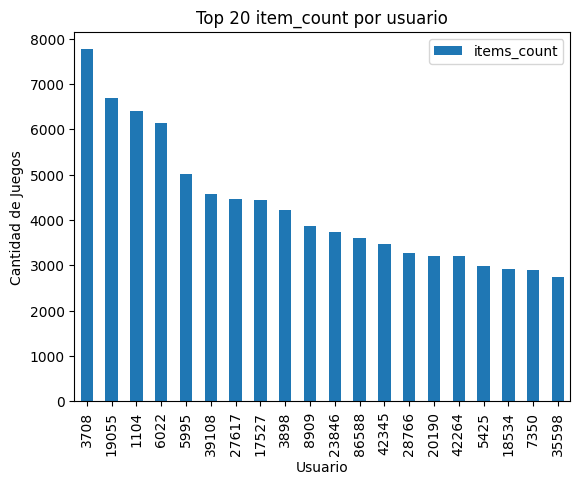

In [52]:
plt.figure(figsize=(14, 5))
userItemCountDf[:20].plot(kind='bar')
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 20 item_count por usuario')
plt.show()

<h2>Preparación Machine Learning

Se propone crear un modelo de recomendación item-item en donde se ingrese el nombre de un juego y recomienden juegos similares. Para esto se tomarán en cuenta la similitud en cuanto a género, el porcentaje de recomendación, la puntuación de sentimiento promedio, y el número de reseñas.

In [54]:
userReviewsExplodedData = pd.read_parquet('data/userReviewsExploded.parquet')
userReviewsExplodedDf = pd.DataFrame(userReviewsExplodedData[['item_id', 'recommend', 'sentiment_analysis']])
steamGamesGenresData = pd.read_parquet('data/steamGamesGenres.parquet')
steamGamesGenresDf = pd.DataFrame(steamGamesGenresData[['item_id', 'genres']])
steamGamesData = pd.read_parquet('data/steamGames.parquet')
steamGamesDf = pd.DataFrame(steamGamesData[['item_id', 'app_name']])

In [55]:
steamGamesDf.head()

,item_id,app_name
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,Log Challenge


In [56]:
userReviewsExplodedDf.head()

,item_id,recommend,sentiment_analysis
0,1250,True,2
1,22200,True,2
2,43110,True,2
3,251610,True,2
4,227300,True,2


In [57]:
steamGamesGenresDf.head()

,item_id,genres
0,761140,"[Action, Casual, Indie, Simulation, Strategy]"
1,643980,"[Free to Play, Indie, RPG, Strategy]"
2,670290,"[Casual, Free to Play, Indie, Simulation, Sports]"
3,767400,"[Action, Adventure, Casual]"
4,772540,"[Action, Adventure, Simulation]"


In [58]:
userReviewsExplodedDf['sentiment_analysis'] = userReviewsExplodedDf['sentiment_analysis'].astype(int)
reviewCountDf = userReviewsExplodedDf.groupby('item_id')['sentiment_analysis'].count().reset_index()
userReviewsExplodedDf = userReviewsExplodedDf.groupby('item_id')[['recommend','sentiment_analysis']].mean().reset_index()
userReviewsExplodedDf = pd.merge(userReviewsExplodedDf, steamGamesDf, how='left', on='item_id')
userReviewsExplodedDf = pd.merge(userReviewsExplodedDf, reviewCountDf, how='left', on='item_id')
userReviewsExplodedDf['recommend'] = userReviewsExplodedDf['recommend'] * 100
userReviewsExplodedDf = userReviewsExplodedDf.rename(columns={'recommend': 'recommend_percentage', 'sentiment_analysis_x': 'overall_sentiment_score','sentiment_analysis_y': 'review_count'})
userReviewsExplodedDf = userReviewsExplodedDf.round(2)
userReviewsExplodedDf = userReviewsExplodedDf.dropna(subset='app_name')

In [59]:
userReviewsExplodedDf.head().sort_values(by='overall_sentiment_score', ascending= False).reset_index(drop=True)

,item_id,recommend_percentage,overall_sentiment_score,app_name,review_count
0,10130,100.00,2.00,TimeShift™,2
1,10150,100.00,1.67,Prototype™,9
2,10090,98.08,1.65,Call of Duty: World at War,52
3,10,98.25,1.56,Counter-Strike,57
4,10140,100.00,0.00,3D Ultra™ Minigolf Adventures,1


In [60]:
dataType(userReviewsExplodedDf)

,name,data_type,not_null_%,null_%,null
0,item_id,[<class 'str'>],100.0,0.0,0
1,recommend_percentage,[<class 'float'>],100.0,0.0,0
2,overall_sentiment_score,[<class 'float'>],100.0,0.0,0
3,app_name,[<class 'str'>],100.0,0.0,0
4,review_count,[<class 'int'>],100.0,0.0,0
